In [11]:
# Monty Hall

# presented with three doors. Behind one door (chosen at random) sits a prize.
# You must select (guess) a door. If you guess correctly, you get the prize.
# But, when you select your door, the show's host throws in a bit of a twist,
# opening one of the other two doors ... specifically a door that doesn't
# contain the prize. He asks you if you'd like to change your door selection,
# to the only other remaining door (not the one you picked originally and not
# the now open door). Do you change your selection? Why?
 
# Answer: Yes. ALWAYS change your selection. By sticking with your original
# door selection, you have a 1/3 chance of getting the prize. By switching, you
# end up with a 2/3 chance of getting the prize.
 
# I explain why on my code blog at: code.jasonbhill.com
 
# I'm going to write this as a tutorial example for object oriented programming
# in Python. The idea is that we'll have a class object representing the game.
# We'll have variables inside that class that hold information about the game
# state, and methods (functions) that advance the game state.
 
# ver http://code.jasonbhill.com/python/modeling-the-monty-hall-problem-with-python/ 

# https://es.wikipedia.org/wiki/Problema_de_Monty_Hall

In [12]:
import random # We need the random module to select integers in [1,3] randomly

from numba import jit
from numpy import arange

In [13]:
def elige_puerta():
# escoge una puerta al azar con número del uno al tres
    return random.randint(1,3)

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

def grafico_tarta(ganadas, perdidas):

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Ganadas', 'Perdidas'
    sizes = [ganadas, perdidas]
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()


Opcion a) Mantenemos la elección original
Opcion b) Cambio de Puerta
Inicio de la Simulación
Resultados de la simulación Opcion a):
Un millón de partidas (conservando la puerta original)::
  ganadas: 332286 games
  perdidas: 667714 games
  Probabilidad: 33.23% porcentaje ganar



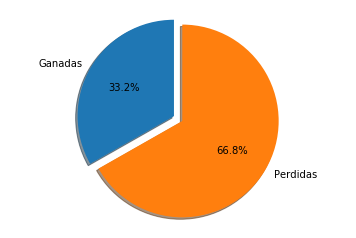

Resultados de la simulación OPCION b):
Un millón de partidas (conservando la puerta original)::
  ganadas: 666358 games
  perdidas: 333642 games
  Probabilidad: 66.64% porcentaje ganar



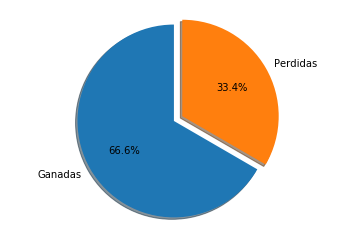

Fin de la Simulación


In [15]:
 class MontyHall:
    """
    Class to model the Monty Hall problem.
    """

    def __init__(self):
        self.prize_door = elige_puerta()
        self.selected_door = None
        self.removed_door = None

    def select_door(self):
        """
        Randomly selects a door for the contestant.
        """
        self.selected_door =elige_puerta()

    def remove_door(self):
        """
        This is how the host removes a (non-prize/non-selected) door..
        """
        # Pick a door at random.
        d = elige_puerta()
        # If that door is the prize door or the contestant's door, re-pick.
        while d == self.selected_door or d == self.prize_door:
            d = elige_puerta()
        # set the removed door to d
        self.removed_door = d
 
    def switch_choice(self):
        """
        Switches the selected door once a non-prize door is removed.
        """
        # 1+2+3=6. There's only one choice of door if we switch our selection.
        self.selected_door = 6 - self.selected_door - self.removed_door
    def user_wins(self):
        """
        Determine if the user wins. Return true on win, false on lose.
        """
        if self.selected_door == self.prize_door:
            return True
        else:
            return False
    def run_game(self, switch=True):

        self.select_door()

        self.remove_door()

        if switch:
            self.switch_choice()

        return self.user_wins()
 
 
 
# Now, we'll run the game. When asked if we want to switch door selection when
# the door is removed by the host, we'll say 'yes' and switch our choice of
# door. We'll run that experiment one million times, always switching choice
# when given the chance. Here's what that looks like:


import ipywidgets as widgets
from IPython.display import display
progress = widgets.IntProgress(min=0, max=100, value=1)
progress.bar_style = 'success'

m=MontyHall()

def simulacion_CambioPuerta():
    wins, losses = 0, 0

    for i in range(1000000):
        progress.value = i /10000
    # make an instance of the game, call it 'm'
    #    m = MontyHall()
        m.prize_door = elige_puerta()
        m.selected_door = None
        m.removed_door = None
        # run the game and switch choice of door.
        if m.run_game(switch=True):
            wins += 1
        else:
            losses += 1
    perc_win = 100.0*wins / (wins+losses)
    print ("Resultados de la simulación OPCION b):") 
    print ("Un millón de partidas (conservando la puerta original)::")
    print ("  ganadas:", wins, "games")
    print ("  perdidas:", losses, "games")
    print ("  Probabilidad: %.2f%% porcentaje ganar\n" % perc_win)
    grafico_tarta(wins,losses)

 
def simulacion_SinCambioPuerta():
    wins, losses = 0, 0
    for i in range(1000000):
        progress.value = i /10000
        m.prize_door = elige_puerta()
        m.selected_door = None
        m.removed_door = None
        if m.run_game(switch=False):
            wins += 1
        else:
            losses += 1
    perc_win = 100.0*wins / (wins+losses)
    print ("Resultados de la simulación Opcion a):") 
    print ("Un millón de partidas (conservando la puerta original)::")
    print ("  ganadas:", wins, "games")
    print ("  perdidas:", losses, "games")
    print ("  Probabilidad: %.2f%% porcentaje ganar\n" % perc_win)
    grafico_tarta(wins,losses)

print ("Inicio de la Simulación")
print ("Opcion a) Mantenemos la elección original")   
print ("Opcion b) Cambio de Puerta")
display(progress)
simulacion_SinCambioPuerta()
simulacion_CambioPuerta()
print("Fin de la Simulación")
 
# Now that the game has been run one million times, compute/display stats.